# CHAPTER 2 - DATA AND SAMPLING DISTRIBUTION

In [7]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

DATA = Path('.').resolve() / 'data'

In [8]:
PENCURIAN_CSV = DATA / 'Pencurian.csv'
pencurian = pd.read_csv(PENCURIAN_CSV)

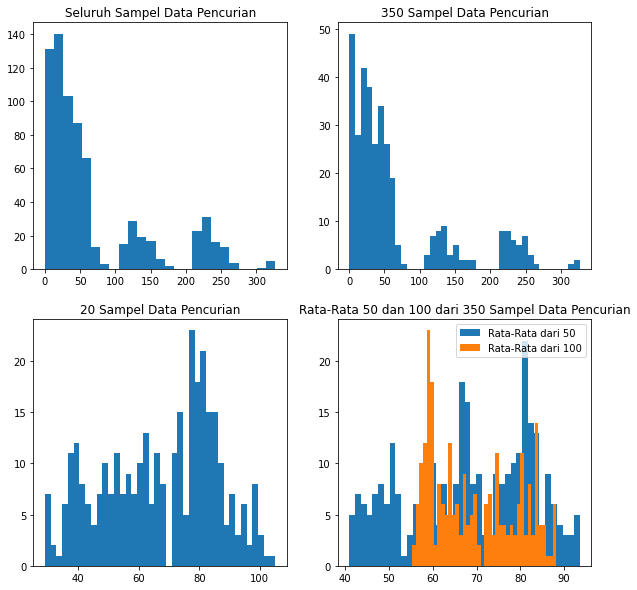

In [9]:
#Menghitung beberapa rata-rata :

#Mengambil 350 Sampel Data
samples = pencurian.sample(n=350)

#Rata-rata dari 20 data
sample_mean_20 = samples.rolling(20).mean().Pencurian
sample_mean_20 = sample_mean_20.dropna()

#Rata-rata dari 50 data
sample_mean_50 = samples.rolling(50).mean().Pencurian
sample_mean_50 = sample_mean_50.dropna()

#Rata-rata dari 100 data
sample_mean_100 = samples.rolling(100).mean().Pencurian
sample_mean_100 = sample_mean_100.dropna()

fig = plt.figure(figsize=(10,10))
#Distribusi seluruh sampel yang di ambil
ax = fig.add_subplot(2,2,1)
ax.hist(pencurian.Pencurian,bins=25)
plt.title('Seluruh Sampel Data Pencurian')

#Distribusi 350 Sampel Data

ax = fig.add_subplot(2,2,2)
ax.hist(samples.Pencurian,bins=40)
plt.title('350 Sampel Data Pencurian')

#Distribusi rata-rata dari 20 data di 350 sampel data
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_20,bins=40)
plt.title('20 Sampel Data Pencurian')

#Distribusi rata-rata dari 50 dan 100 data di 350 sampel data
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_50,bins=40,label='Rata-Rata dari 50')
ax.hist(sample_mean_100,bins=40,label='Rata-Rata dari 100')
plt.title('Rata-Rata 50 dan 100 dari 350 Sampel Data Pencurian')
ax.legend()
plt.show()

plt.show()

In [10]:
i=0
curi=pencurian['Pencurian']

In [11]:
def mean_while(curi) :
    i=0
    hasil=0
    while i<len(curi):
        hasil = hasil + curi[i]
        i += 1
    hasil = hasil/len(curi)
    return hasil

In [12]:
def STD(curi):
    i=0
    varian=0
    while i < len(curi):
        varian = varian + pow((curi[i]-mean_while(curi)),2)
        i += 1
    varian = varian/(len(curi)-1)
    STD = np.sqrt(varian)
    return STD

In [13]:
def standardError(curi):
    STE = STD(curi) / np.sqrt(len(curi))
    return STE

In [14]:
print('Standard Deviation Pencurian\t: ',STD(curi))
print('Mean Data Pencurian\t\t: ', mean_while(curi))
print('Median Data Pencurian\t\t: ',curi.median())
print('Standard Error Data Pencurian\t: ', standardError(curi))

Standard Deviation Pencurian	:  76.46760639260867
Mean Data Pencurian		:  68.61049723756906
Median Data Pencurian		:  38.0
Standard Error Data Pencurian	:  2.841896210457921


In [15]:
bootstrap_100 = np.random.choice(pencurian.Pencurian,size=100,replace=True)
bootstrap_250 = np.random.choice(pencurian.Pencurian,size=250,replace=True)
bootstrap_450 = np.random.choice(pencurian.Pencurian,size=450,replace=True)
arr_bootstraps = [bootstrap_100,bootstrap_250,bootstrap_450]
len(arr_bootstraps)

3

In [16]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',STD(arr_bootstraps[i]))
    print('Bootstrap Mean : ',mean_while(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',pencurian.Pencurian.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',standardError(arr_bootstraps[i]))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 100 examples 

------------------------------------------------------------------------------

Bootstrap STD :  66.49575895947021
Bootstrap Mean :  57.03
Bootstrap Median:  27.0
Boostrap Bias,  11.580497237569062
Standard Error: 6.649575895947021

------------------------------------------------------------------------------

Bootstrap Stats for 250 examples 

------------------------------------------------------------------------------

Bootstrap STD :  78.11923375668076
Bootstrap Mean :  62.424
Bootstrap Median:  34.5
Boostrap Bias,  6.186497237569064
Standard Error: 4.940694154764462

------------------------------------------------------------------------------

Bootstrap Stats for 450 examples 

------------------------------------------------------------------------------

Bootstrap STD :  76.64691989327723
Bootstrap Mean :  70.30222222222223
Bootstrap Median:  40.0
Boostrap Bias,  -1.6917249846531632
Standard Error: 3.6131704542398944

----------------------